In [ ]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

# Load the CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar10.load_data()

# Flatten the labels
y_train = y_train.flatten()
y_test = y_test.flatten()

# Normalize the images to the range [0, 1]
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

# Reshape the data for logistic regression (flatten images)
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

# One-hot encode the labels
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
# Define the logistic regression model
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer(input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model
history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=1)

# Extract accuracy and error rates
train_accuracies = history.history['accuracy']
test_accuracies = history.history['val_accuracy']
train_errors = [1 - acc for acc in train_accuracies]
test_errors = [1 - acc for acc in test_accuracies]

Epoch 1/100
1563/1563 [==============================] - 6s 3ms/step - loss: 1.9523 - accuracy: 0.3193 - val_loss: 2.0060 - val_accuracy: 0.3345
Epoch 2/100
1563/1563 [==============================] - 7s 5ms/step - loss: 1.8853 - accuracy: 0.3525 - val_loss: 2.0188 - val_accuracy: 0.3267
Epoch 3/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8508 - accuracy: 0.3628 - val_loss: 1.8149 - val_accuracy: 0.3592
Epoch 4/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8411 - accuracy: 0.3682 - val_loss: 2.0113 - val_accuracy: 0.3019
Epoch 5/100
1563/1563 [==============================] - 6s 4ms/step - loss: 1.8349 - accuracy: 0.3744 - val_loss: 1.9301 - val_accuracy: 0.3398
Epoch 6/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8313 - accuracy: 0.3749 - val_loss: 1.8375 - val_accuracy: 0.3771
Epoch 7/100
1563/1563 [==============================] - 4s 3ms/step - loss: 1.8156 - accuracy: 0.3794 - val_loss: 1.9813 - val_ac

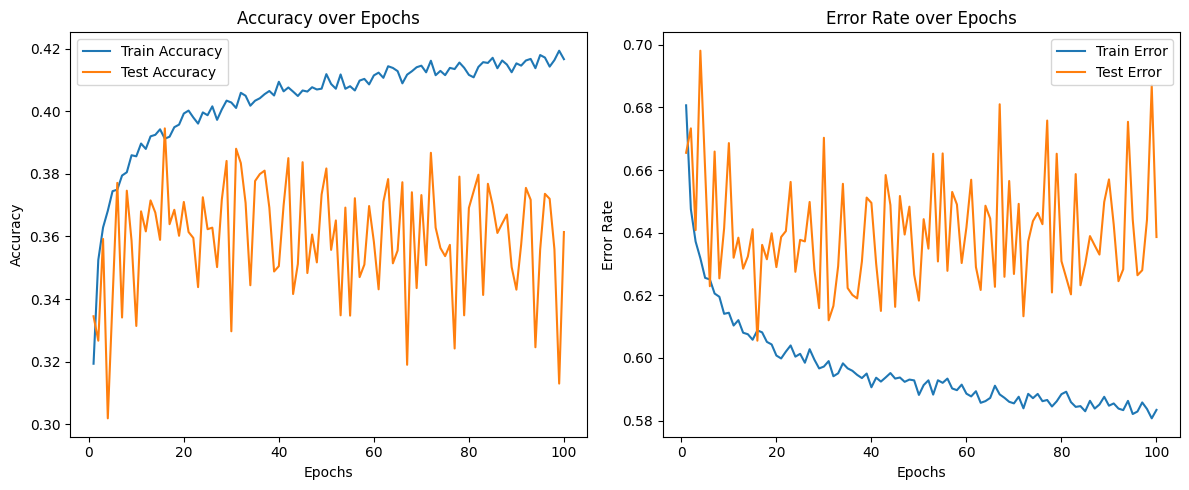

In [11]:
# Plotting Accuracy and Error Rates
epochs = range(1, len(train_accuracies) + 1)

plt.figure(figsize=(12, 5))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(epochs, train_accuracies, label='Train Accuracy')
plt.plot(epochs, test_accuracies, label='Test Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Accuracy over Epochs')
plt.legend()

# Error Rate Plot
plt.subplot(1, 2, 2)
plt.plot(epochs, train_errors, label='Train Error')
plt.plot(epochs, test_errors, label='Test Error')
plt.xlabel('Epochs')
plt.ylabel('Error Rate')
plt.title('Error Rate over Epochs')
plt.legend()

plt.tight_layout()
plt.show()

Test Loss: 1.9080770015716553
Test Accuracy: 0.3614000082015991
313/313 [==============================] - 1s 4ms/step


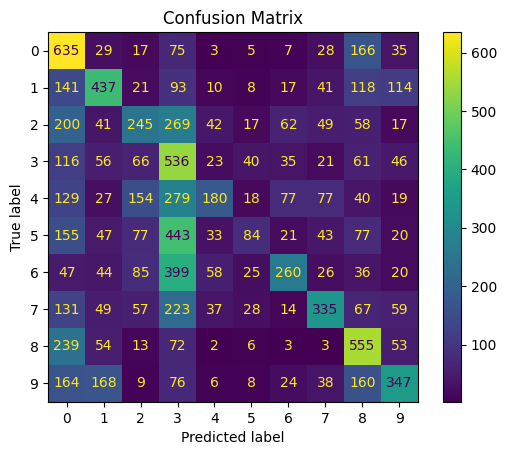


Precision: 0.4035520912847124
Recall: 0.3614
F1-score: 0.34828184744395874


In [19]:
# Predict labels for test images
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)

print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

# Get predictions for the test set
y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)

# Display confusion matrix
ConfusionMatrixDisplay(conf_matrix, display_labels=range(10)).plot()
plt.title("Confusion Matrix")
plt.show()


# Calculate precision, recall, and F1-score
precision = precision_score(y_test_classes, y_pred_classes, average='weighted')
recall = recall_score(y_test_classes, y_pred_classes, average='weighted')
f1 = f1_score(y_test_classes, y_pred_classes, average='weighted')

print("\nPrecision:", precision)
print("Recall:", recall)
print("F1-score:", f1)

